In [289]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [290]:
# create dataframe for the datasets
filepath = 'data/nuclear_energy_overview_eia.csv'
df = pd.read_csv(filepath)
df.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,Not Available,14.533,6246,3.9,57.8
1,1973,February,Not Available,14.533,5928,4.1,60.7
2,1973,March,Not Available,15.314,6649,4.5,58.4
3,1973,April,Not Available,15.314,5876,4.2,53.4
4,1973,May,Not Available,16.174,5697,3.9,47.3


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  614 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


In [292]:
# Replace all instances of 'Not Available' with 'nan' in column: 'Nuclear Generating Units, Total Operable Units'
df['Nuclear Generating Units, Total Operable Units'] = df['Nuclear Generating Units, Total Operable Units'].replace('Not Available', np.nan) # without inplace true

df.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,NaN,14.533,6246,3.9,57.8
1,1973,February,NaN,14.533,5928,4.1,60.7
2,1973,March,NaN,15.314,6649,4.5,58.4
3,1973,April,NaN,15.314,5876,4.2,53.4
4,1973,May,NaN,16.174,5697,3.9,47.3


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  372 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


In [294]:
missing_in_col = df['Nuclear Generating Units, Total Operable Units'].isna().sum()
print(f'There are {missing_in_col} missing values in that column')

There are 242 missing values in that column


In [295]:
# Drop column: 'Nuclear Generating Units, Total Operable Units'
df = df.drop(columns=['Nuclear Generating Units, Total Operable Units'])
df.head()

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,14.533,6246,3.9,57.8
1,1973,February,14.533,5928,4.1,60.7
2,1973,March,15.314,6649,4.5,58.4
3,1973,April,15.314,5876,4.2,53.4
4,1973,May,16.174,5697,3.9,47.3


In [296]:
# convert the month column to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df = df.sort_values('Date')
df.set_index('Date', inplace=True) # modify the dataframe directly so no copy is returned
df

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
Date,,,,,,
1973-01-01,1973,January,14.533,6246,3.9,57.8
1973-02-01,1973,February,14.533,5928,4.1,60.7
1973-03-01,1973,March,15.314,6649,4.5,58.4
1973-04-01,1973,April,15.314,5876,4.2,53.4
1973-05-01,1973,May,16.174,5697,3.9,47.3
...,...,...,...,...,...,...
2023-10-01,2023,October,95.746,61403,18.6,86.2
2023-11-01,2023,November,95.746,62258,19.3,90.3
2023-12-01,2023,December,95.746,68898,19.9,96.7


In [320]:
df.describe()

,Year,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor",YoY Growth (%)
count,614.000000,614.000000,614.000000,614.000000,614.000000,613.000000
mean,1998.084691,85.607122,49806.475570,17.216612,76.496254,0.315432
std,14.782137,23.286221,19647.098419,4.175843,16.281111,1.253065
min,1973.000000,14.533000,5697.000000,3.900000,34.600000,-2.653536
25%,1985.000000,78.707750,31481.500000,15.525000,61.025000,0.000000
50%,1998.000000,98.533000,57362.000000,18.800000,79.150000,0.000000
75%,2011.000000,99.628000,65169.250000,20.100000,91.875000,0.000000
max,2024.000000,102.206000,74649.000000,22.900000,101.600000,15.796958


In [ ]:

df_stats = df.describe().reset_index() # to get describe() row not as 
df_stats = df_stats.drop(columns=['Year', 'YoY Growth (%)'])
markdown_table = tabulate(df_stats, headers='keys', tablefmt='github', showindex=False)
print(markdown_table)

| index   |   Nuclear Generating Units, Net Summer Capacity |   Nuclear Electricity Net Generation |   Nuclear Share of Electricity Net Generation |   Nuclear Generating Units, Capacity Factor |
|---------|-------------------------------------------------|--------------------------------------|-----------------------------------------------|---------------------------------------------|
| count   |                                        614      |                                614   |                                     614       |                                    614      |
| mean    |                                         85.6071 |                              49806.5 |                                      17.2166  |                                     76.4963 |
| std     |                                         23.2862 |                              19647.1 |                                       4.17584 |                                     16.2811 |
| min     |              

In [298]:
df.columns # get column names

Index(['Year', 'Month', 'Nuclear Generating Units, Net Summer Capacity',
       'Nuclear Electricity Net Generation',
       'Nuclear Share of Electricity Net Generation',
       'Nuclear Generating Units, Capacity Factor'],
      dtype='object')

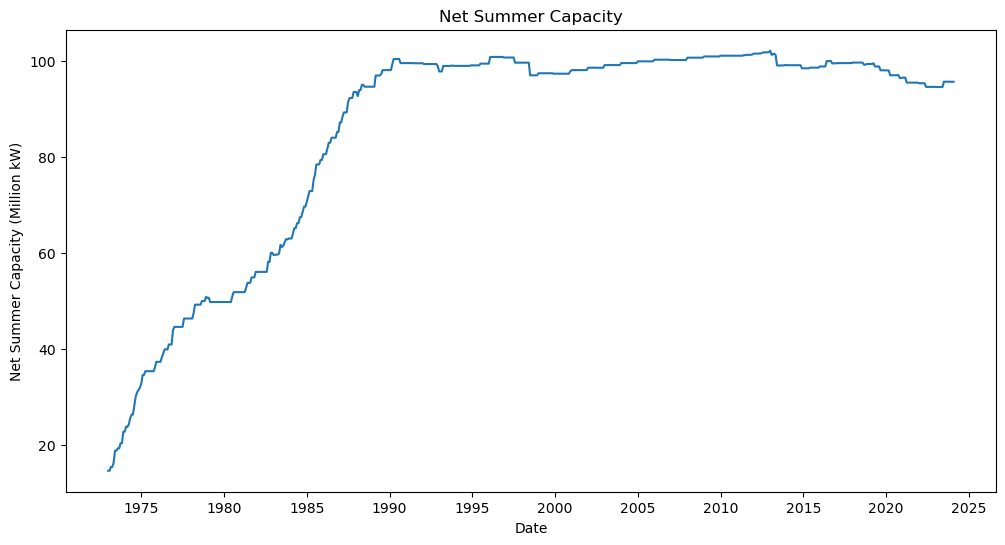

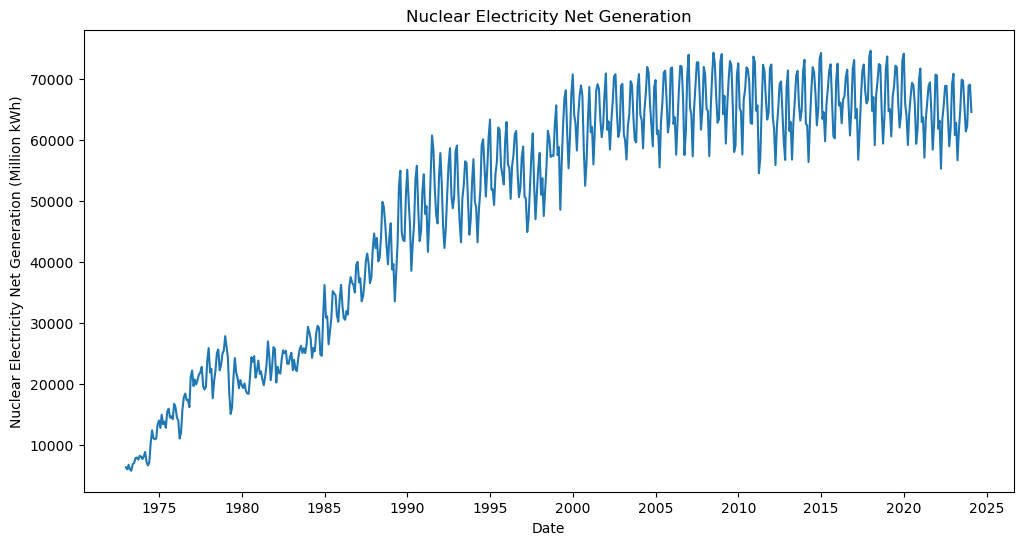

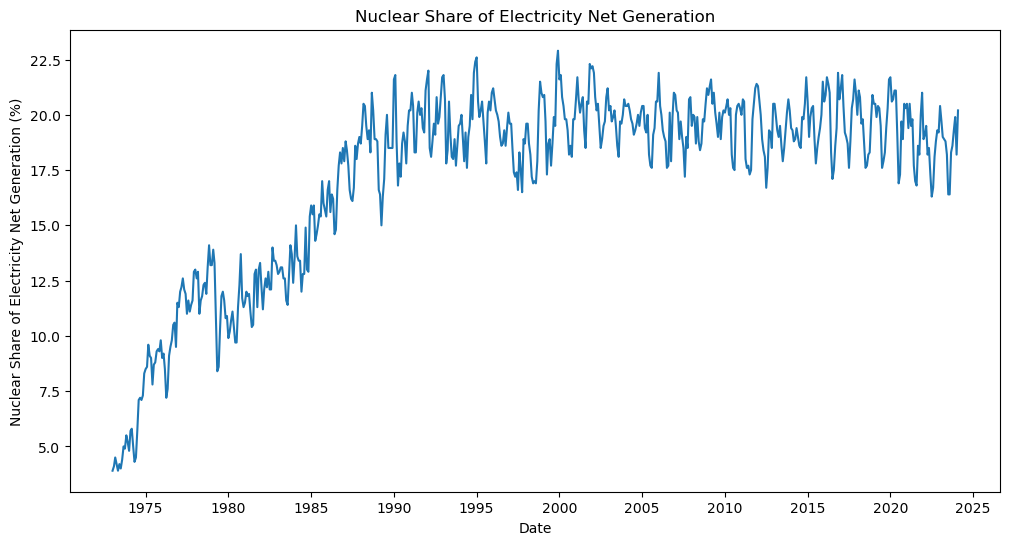

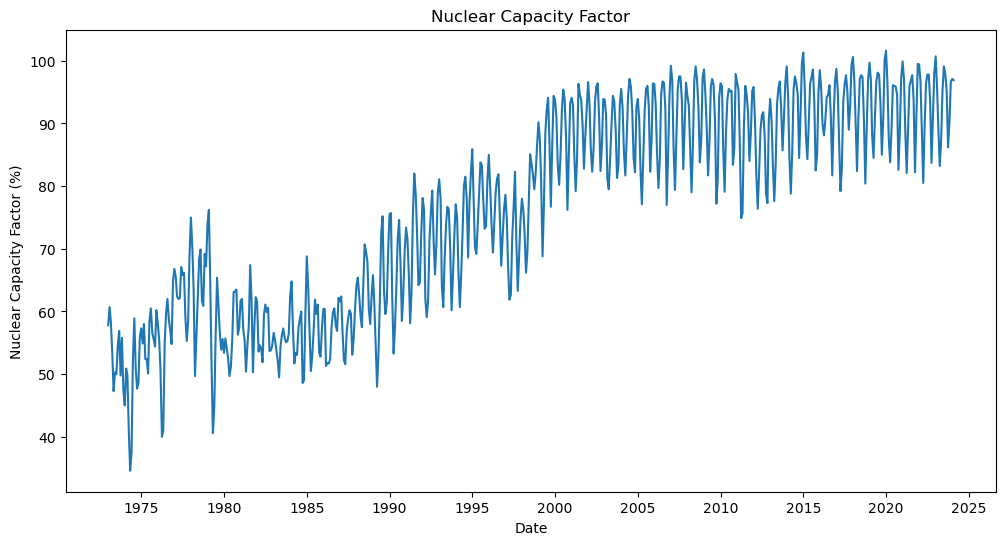

In [299]:
# Timeseries data
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.title('Net Summer Capacity')
sns.lineplot(x='Date', y='Nuclear Generating Units, Net Summer Capacity', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Net Summer Capacity (Million kW)')
# plt.grid(True)

plt.figure(figsize=(12,6))
plt.title('Nuclear Electricity Net Generation')
sns.lineplot(x='Date', y='Nuclear Electricity Net Generation', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Nuclear Electricity Net Generation (Million kWh)')
# plt.grid(True)

plt.figure(figsize=(12,6))
plt.title('Nuclear Share of Electricity Net Generation')
sns.lineplot(x='Date', y='Nuclear Share of Electricity Net Generation', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Nuclear Share of Electricity Net Generation (%)')
# plt.grid(True)

plt.figure(figsize=(12,6))
plt.title('Nuclear Capacity Factor')
sns.lineplot(x='Date', y='Nuclear Generating Units, Capacity Factor', data=df)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # major tick every 5 years
plt.ylabel('Nuclear Capacity Factor (%)')
# plt.grid(True)
plt.show()


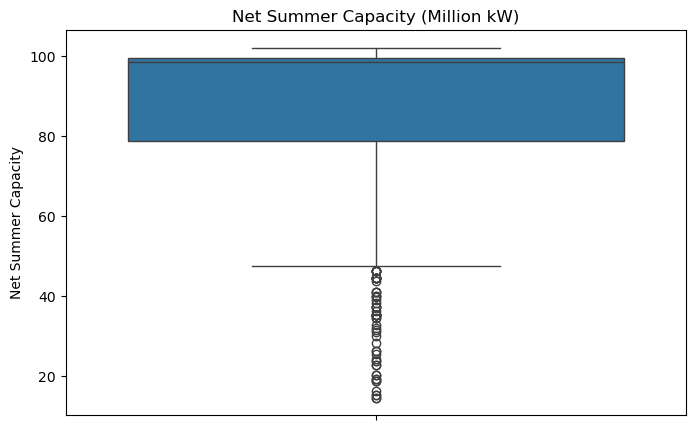

In [300]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Nuclear Generating Units, Net Summer Capacity', data=df)
plt.title('Net Summer Capacity (Million kW)')
plt.ylabel('Net Summer Capacity')
plt.show()

# comments: there are outliers but still a valid data

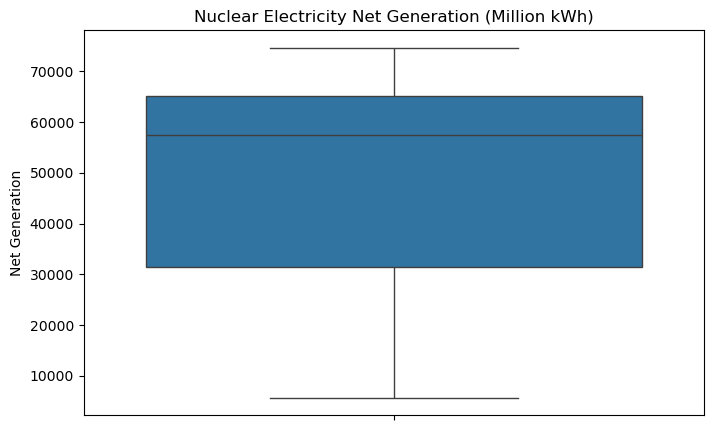

In [301]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Nuclear Electricity Net Generation', data=df)
plt.title('Nuclear Electricity Net Generation (Million kWh)')
plt.ylabel('Net Generation')
plt.show()

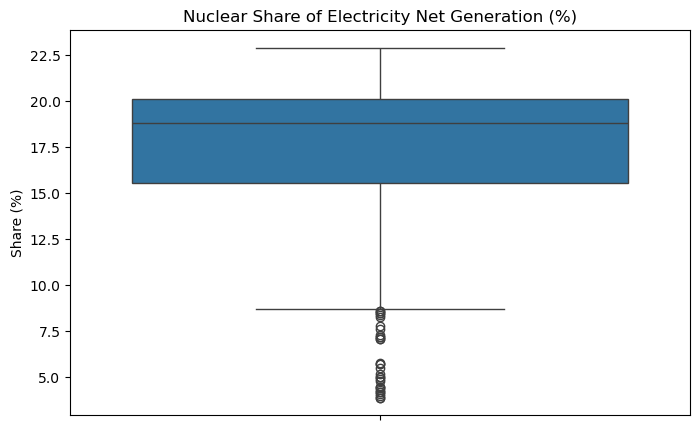

In [302]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Nuclear Share of Electricity Net Generation', data=df)
plt.title('Nuclear Share of Electricity Net Generation (%)')
plt.ylabel('Share (%)')
plt.show()

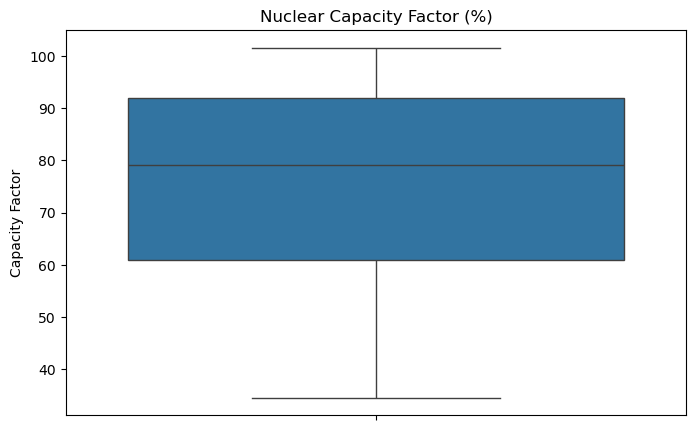

In [303]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Nuclear Generating Units, Capacity Factor', data=df)
plt.title('Nuclear Capacity Factor (%)')
plt.ylabel('Capacity Factor')
plt.show()

In [304]:
df.columns[2]

'Nuclear Generating Units, Net Summer Capacity'

<Axes: xlabel='Month', ylabel='Nuclear Generating Units, Capacity Factor'>

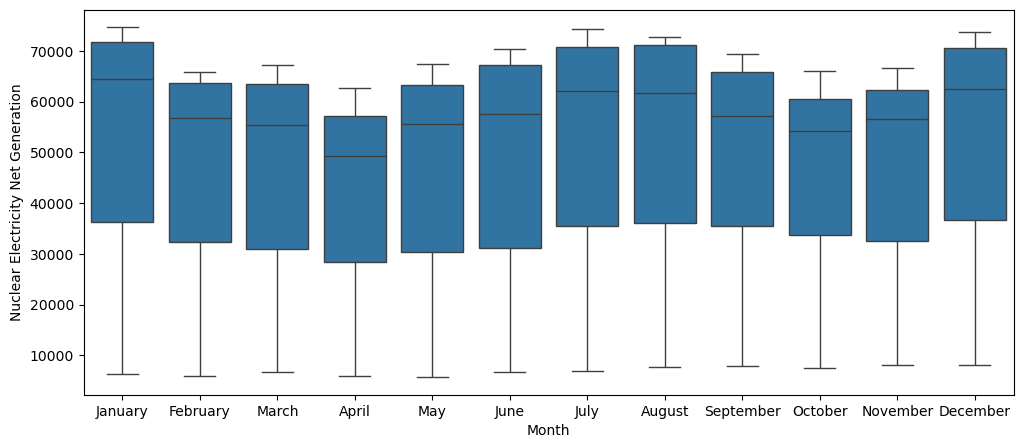

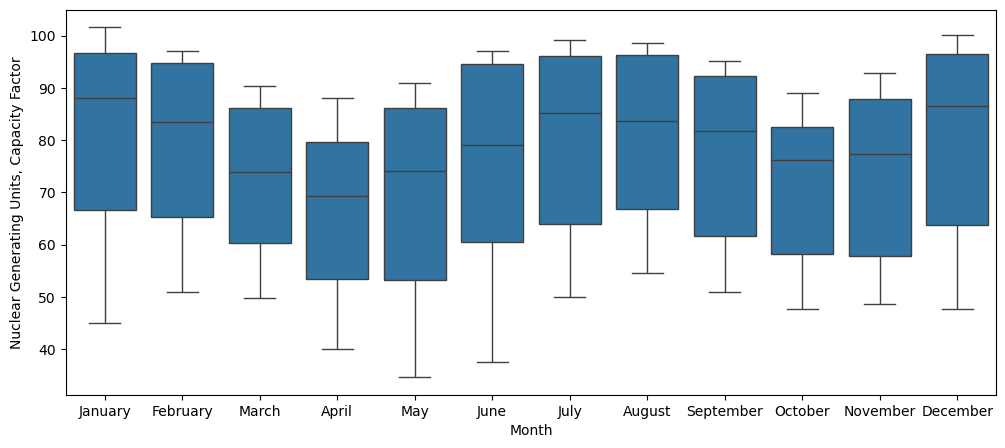

In [305]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y=df.columns[3], data=df)

plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y=df.columns[5], data=df)

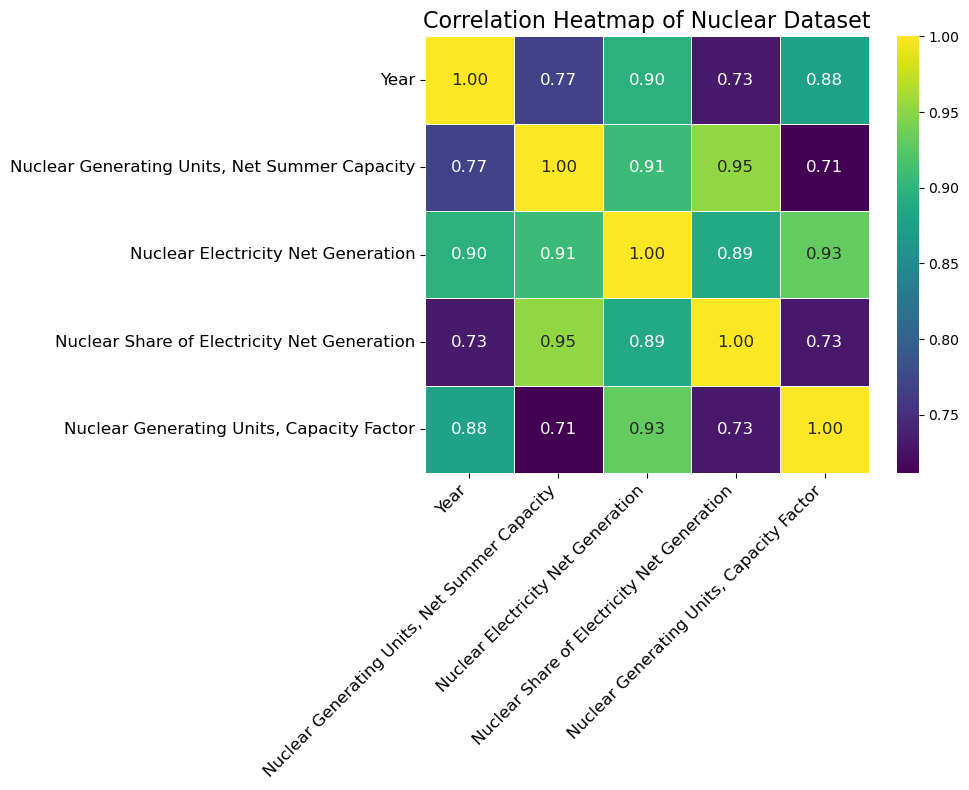

In [306]:
corr = df[[df.columns[0], df.columns[2], df.columns[3], df.columns[4], df.columns[5]]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format numbers
    cmap='viridis',     # color map
    cbar=True,           # show color bar
    linewidths=0.5,      # lines between cells
    annot_kws={"size":12} # font size for annotations
)
# Rotate labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Heatmap of Nuclear Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [307]:
df['Nuclear Generating Units, Net Summer Capacity'].describe()
df['Nuclear Generating Units, Net Summer Capacity'].max()
df[df['Nuclear Generating Units, Net Summer Capacity'] == df['Nuclear Generating Units, Net Summer Capacity'].max()] # get month and year at maximum value of the column

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
Date,,,,,,
2013-01-01,2013,January,102.206,71406,20.5,93.9


Text(0, 0.5, 'Net Summer Capacity (Million kW)')

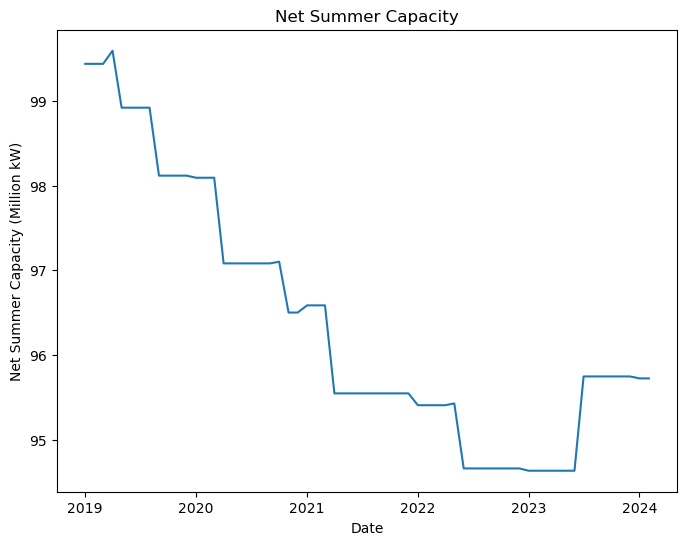

In [308]:
# get the last five years data (2019 to 2024)
df_last5 = df[df['Year'] >= 2019]
df_last5.columns[2]

plt.figure(figsize=(8,6))
plt.title('Net Summer Capacity')
sns.lineplot(x='Date', y='Nuclear Generating Units, Net Summer Capacity', data=df_last5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # major tick every 5 years
plt.ylabel('Net Summer Capacity (Million kW)')

In [309]:
# Calculate year-over-year growth
df['YoY Growth (%)'] = df[df.columns[2]].pct_change() * 100
df

,Year,Month,"Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor",YoY Growth (%)
Date,,,,,,,
1973-01-01,1973,January,14.533,6246,3.9,57.8,NaN
1973-02-01,1973,February,14.533,5928,4.1,60.7,0.000000
1973-03-01,1973,March,15.314,6649,4.5,58.4,5.373976
1973-04-01,1973,April,15.314,5876,4.2,53.4,0.000000
1973-05-01,1973,May,16.174,5697,3.9,47.3,5.615776
...,...,...,...,...,...,...,...
2023-10-01,2023,October,95.746,61403,18.6,86.2,0.000000
2023-11-01,2023,November,95.746,62258,19.3,90.3,0.000000
2023-12-01,2023,December,95.746,68898,19.9,96.7,0.000000


In [310]:
# major expansion era total growth
ov_first = df.loc[df['Year'] == 1973, df.columns[2]].values[0]
ov_last = df.loc[df['Year'] == 1990, df.columns[2]].values[0]
growth_ovyr = (ov_last - ov_first) / ov_first * 100

# slow growth era total growth
sg_first = df.loc[df['Year'] == 1990, df.columns[2]].values[0]
sg_last = df.loc[df['Year'] == 2003, df.columns[2]].values[0]
growth_sgyr = (sg_last - sg_first) / sg_first * 100

# last 5-year total growth
first = df_last5.loc[df['Year'] == df_last5['Year'].min(), df.columns[2]].values[0]
last = df_last5.loc[df['Year'] == df_last5['Year'].max(), df.columns[2]].values[0]
growth_5yr = (last - first) / first * 100

# overall year CAGR
ov_years = df['Year'].max() - df['Year'].min()
ov_cagr = (ov_last / ov_first)**(1/ov_years) - 1

# last 5-year CAGR
years = df_last5['Year'].max() - df_last5['Year'].min()
cagr = (last / first)**(1/years) - 1

print(f"Major Expansion Era Total Growth: {growth_ovyr:.2f}%")
print(f"Slow Growth Era Total Growth: {growth_sgyr:.2f}%")
print(f"5-Year Total Growth: {growth_5yr:.2f}%")
print(f"Overall-Year CAGR: {ov_cagr*100:.2f}%")
print(f"5-Year CAGR: {cagr*100:.2f}%")

Major Expansion Era Total Growth: 575.44%
Slow Growth Era Total Growth: 1.07%
5-Year Total Growth: -3.74%
Overall-Year CAGR: 3.82%
5-Year CAGR: -0.76%


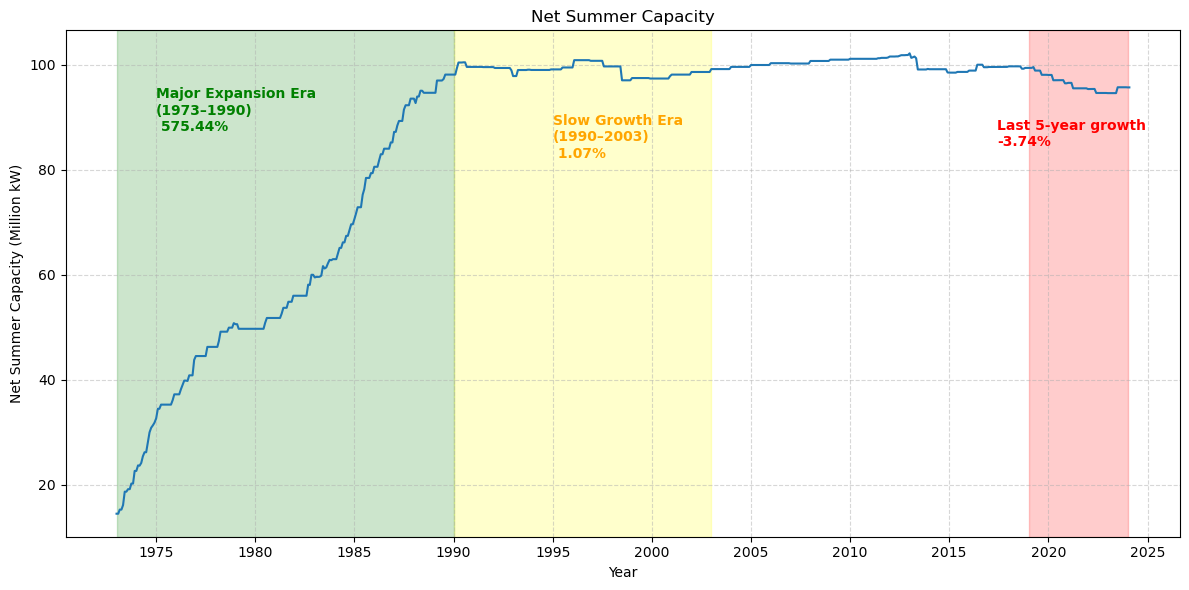

In [311]:
plt.figure(figsize=(12,6))
plt.title('Net Summer Capacity')

# Plot shaded periods
plt.axvspan(pd.Timestamp('2019-01-01'),
            pd.Timestamp('2024-01-01'),
            color='red', alpha=0.2)
plt.axvspan(pd.Timestamp('1973-01-01'),
            pd.Timestamp('1990-01-01'),
            color='green', alpha=0.2)
plt.axvspan(pd.Timestamp('1990-01-01'),
            pd.Timestamp('2003-01-01'),
            color='yellow', alpha=0.2)

# Line plot
sns.lineplot(x='Date', y='Nuclear Generating Units, Net Summer Capacity', data=df)

# Add text annotations inside shaded areas
plt.text(pd.Timestamp('2017-06-01'), 
         df['Nuclear Generating Units, Net Summer Capacity'].max()*0.85,
         f'Last 5-year growth\n{growth_5yr:.2f}%',
         color='red', fontsize=10, weight='bold', ha='left', va='center')
plt.text(pd.Timestamp('1975-01-01'),
         df['Nuclear Generating Units, Net Summer Capacity'].max()*0.85,
         f'Major Expansion Era\n(1973–1990)\n {growth_ovyr:.2f}%',
         color='green', fontsize=10, weight='bold', ha='left', va='bottom')
plt.text(pd.Timestamp('1995-01-01'),
         df['Nuclear Generating Units, Net Summer Capacity'].max()*0.8,
         f'Slow Growth Era\n(1990–2003)\n {growth_sgyr:.2f}%',
         color='orange', fontsize=10, weight='bold', ha='left', va='bottom')

# Axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.ylabel('Net Summer Capacity (Million kW)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# plt.grid(True)

Text(0, 0.5, 'Nuclear Electricity Net Generation (Million kWh)')

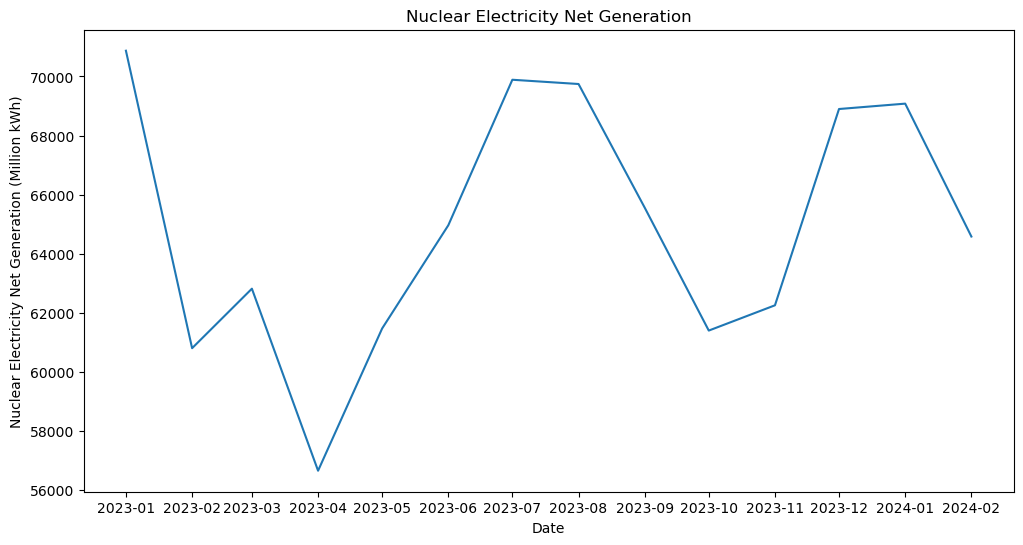

In [312]:
df_last2 = df[df['Year'] >= 2023]

plt.figure(figsize=(12,6))
plt.title('Nuclear Electricity Net Generation')
sns.lineplot(x='Date', y='Nuclear Electricity Net Generation', data=df_last2)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.ylabel('Nuclear Electricity Net Generation (Million kWh)')
# plt.grid(True)

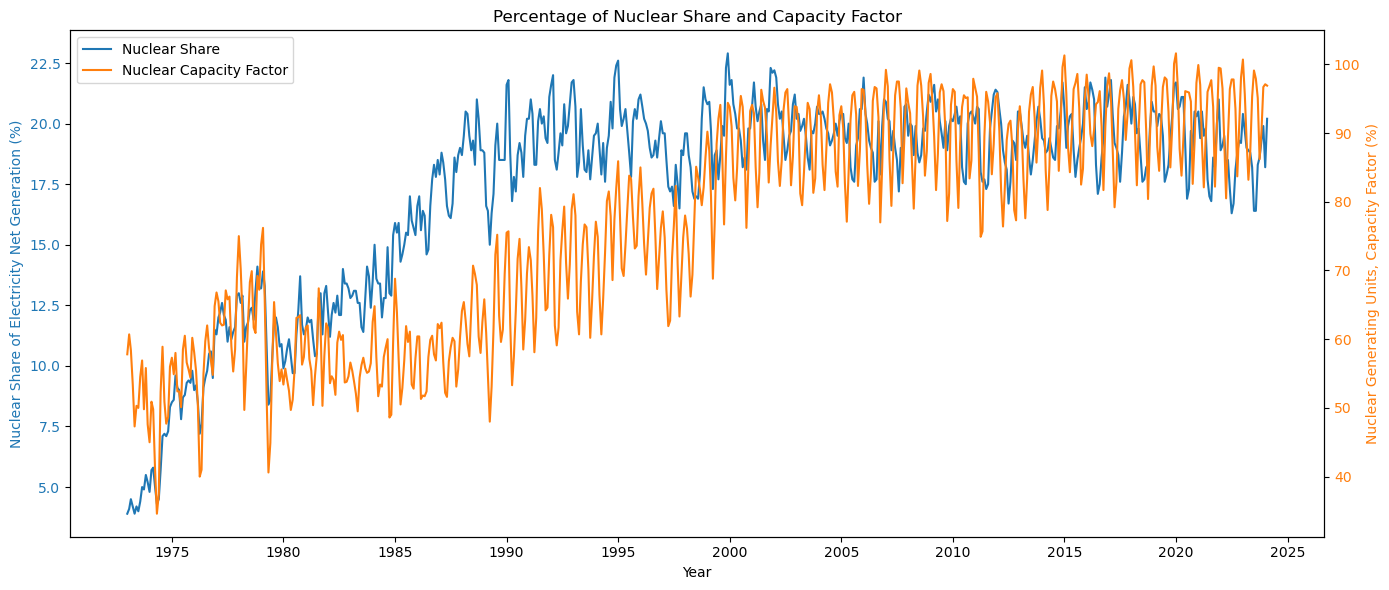

In [313]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Plot Nuclear Share on left y-axis
sns.lineplot(
    x='Date', y='Nuclear Share of Electricity Net Generation',
    data=df, ax=ax1, color='#1f77b4', label='Nuclear Share', legend=False
)
ax1.set_ylabel('Nuclear Share of Electricity Net Generation (%)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Set x-axis major ticks every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_xlabel('Year')

# Create right y-axis for Capacity Factor
ax2 = ax1.twinx()
sns.lineplot(
    x='Date', y='Nuclear Generating Units, Capacity Factor',
    data=df, ax=ax2, color='#ff7f0e', label='Nuclear Capacity Factor', legend=False
)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.set_ylabel('Nuclear Generating Units, Capacity Factor (%)', color='#ff7f0e')
# Optional: Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Percentage of Nuclear Share and Capacity Factor')
plt.tight_layout()
plt.show()